In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import glob
import os
import seaborn as sns
from pylab import *
import math
from IPython.display import Image
from IPython.display import display
from __future__ import print_function
from PIL import Image
import numpy as np
from matplotlib.mlab import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind, ttest_ind_from_stats

In [2]:
os.chdir(r'C:\Users\sl456\Dropbox (HMS)\zKyunKyun_storage\TCGA\Metabric_2012Nature\python\ExpressionAnalysis_PIK3CAmNF1w_PIK3CAmNF1m')

In [3]:
# read csv file

# df_TumorID = pd.read_csv('TumorID_PIK3CAmAny_NF1.csv')
df_TumorID = pd.read_csv('TumorID_PIK3CAm_allMAPKpathway.csv')

#df_expression = pd.read_csv('data_expression.csv')

df_clinical = pd.read_csv('2509tumor_clinical_kyun.csv')
df_clinical.index = df_clinical['Sample ID']

In [4]:
#df[df['model'].str.contains('ac')]

df_TumorID = df_TumorID.replace(np.nan, '', regex=True)

In [5]:
# NF1wt_PIK3CAm and NF1m_PIK3CAm and OtherMut_PIK3CAm

WM_TumorID = df_TumorID.loc[df_TumorID['Group']=='WM']
MM_TumorID = df_TumorID.loc[df_TumorID['Group']=='MM']
OM_TumorID = df_TumorID.loc[df_TumorID['Group']=='OM']

In [6]:
KRAS_TumorID = df_TumorID[df_TumorID['KRAS: MUT AMP GAIN;'].str.contains('CNA' or 'MUT')]
NRAS_TumorID = df_TumorID[df_TumorID['NRAS: MUT AMP GAIN;'].str.contains('CNA' or 'MUT')]
HRAS_TumorID = df_TumorID[df_TumorID['HRAS: MUT AMP GAIN;'].str.contains('CNA' or 'MUT')]
EGFR_TumorID = df_TumorID[df_TumorID['EGFR: MUT AMP GAIN;'].str.contains('CNA' or 'MUT')]
ERBB2_TumorID = df_TumorID[df_TumorID['ERBB2: MUT AMP GAIN;'].str.contains('CNA' or 'MUT')]
ERBB3_TumorID = df_TumorID[df_TumorID['ERBB3: MUT AMP GAIN;'].str.contains('CNA' or 'MUT')]
ERBB4_TumorID = df_TumorID[df_TumorID['ERBB4: MUT AMP GAIN;'].str.contains('CNA' or 'MUT')]

In [8]:
MM_TumorID_clinical = df_clinical.loc[  ((df_clinical['Sample ID'].isin(MM_TumorID['Sample ID'])) & (df_clinical['ER Status']=='+')) ]
WM_TumorID_clinical = df_clinical.loc[  ((df_clinical['Sample ID'].isin(WM_TumorID['Sample ID'])) & (df_clinical['ER Status']=='+')) ]
OM_TumorID_clinical = df_clinical.loc[  ((df_clinical['Sample ID'].isin(OM_TumorID['Sample ID'])) & (df_clinical['ER Status']=='+')) ]

In [9]:
len(NRAS_TumorID)

28

# Pie Plot

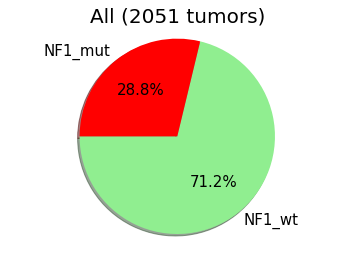

In [10]:
# Data to plot
labels = 'NF1_wt', 'NF1_mut'
sizes = [2051-590, 590]
colors = ['lightgreen', 'red']
explode = (0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180, textprops={'fontsize': 15})
 
plt.axis('equal')
plt.title('All (2051 tumors)', fontsize=20)
plt.show()

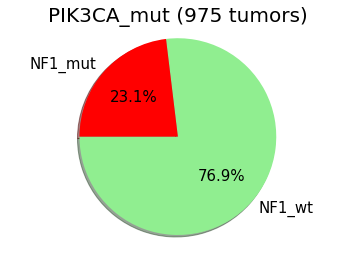

In [11]:
# Data to plot
labels = 'NF1_wt', 'NF1_mut'
sizes = [975-225, 225]
colors = ['lightgreen', 'red']
explode = (0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180, textprops={'fontsize': 15})
 
plt.axis('equal')
plt.title('PIK3CA_mut (975 tumors)', fontsize=20)
plt.show()

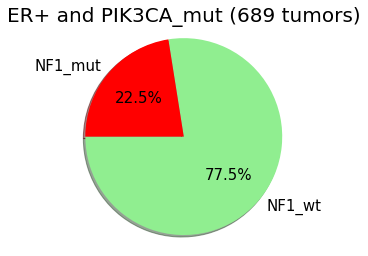

In [12]:
# Data to plot
labels = 'NF1_wt', 'NF1_mut'
sizes = [689-155, 155]
colors = ['lightgreen', 'red']
explode = (0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180, textprops={'fontsize': 15})
 
plt.axis('equal')
plt.title('ER+ and PIK3CA_mut (689 tumors)', fontsize=20)
plt.show()

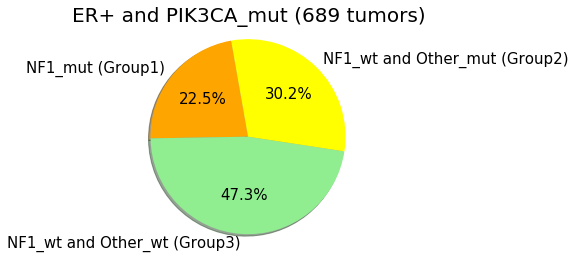

In [16]:
# Data to plot
labels = 'NF1_mut (Group1)', 'NF1_wt and Other_wt (Group3)', 'NF1_wt and Other_mut (Group2)'
sizes = [155, 326, 208]
colors = ['orange', 'lightgreen', 'yellow']
explode = (0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=100, textprops={'fontsize': 15})
 
plt.axis('equal')
plt.title('ER+ and PIK3CA_mut (689 tumors)', fontsize=20)
plt.show()